size(images) = 102 x 18
Data saved in /home/hslab/workspace_python/symbac_pip/testdata/train/


Text(0.5, 1.0, 'Synthetic data')

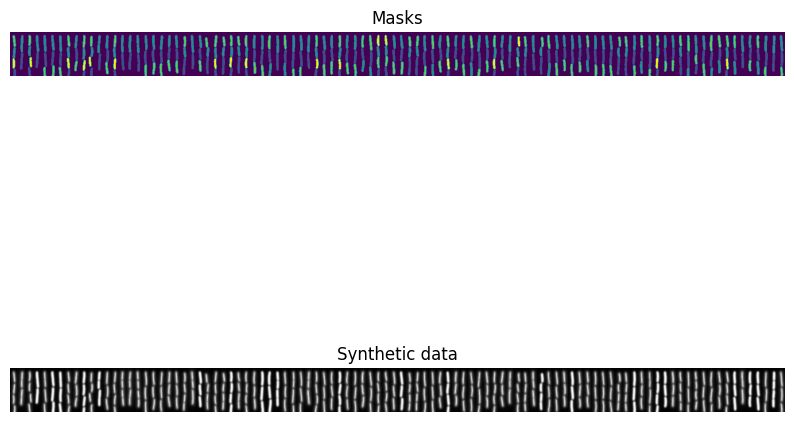

In [4]:
from glob import glob
import os
import random
from PIL import Image 
from skimage.morphology import label
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from skimage.util import img_as_ubyte
np.random.seed(4)

save_dir = "/home/hslab/workspace_python/symbac_pip/testdata"
omni_dir = save_dir + "/train/"
masks_dir = save_dir + "/masks/"
convs_dir = save_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*")) 
img_shape = tifffile.imread(masks[0]).shape
print("size(images) = {} x {}".format(img_shape[0], img_shape[1]))

tile_length = 100
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.

for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)    
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    mask_pic_tile = mask_tile/mask_tile.max()
    mask_pic_tile = img_as_ubyte(mask_pic_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{omni_dir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{omni_dir}/train_{str(i).zfill(5)}.png")

print("Data saved in {}".format(omni_dir))
    
fig, axs = plt.subplots(2, figsize=(10,8))
axs[0].imshow(mask_tile)
axs[1].imshow(conv_tile, cmap="Greys_r")
for ax in axs:
    ax.axis("off")
axs[0].set_title("Masks")
axs[1].set_title("Synthetic data")


In [ ]:
/home/hslab/workspace_python/symbac_pip/bin/python3 -m omnipose --train --use_gpu --dir /home/hslab/workspace_python/symbac_pip/testdata/train/ --mask_filter "_masks" --n_epochs 4000 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16